In [ ]:
# Dataset Pre-processing

In [1]:
#Mount data from drive
from google.colab import drive
drive.mount('/content/Drive') 

Mounted at /content/Drive


In [2]:
import os
os.listdir('/content/Drive')


['My Drive', '.shortcut-targets-by-id', '.Trash']

In [6]:
# Include needed libraries

from gensim import corpora
from gensim.models import LsiModel
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline


In [9]:
#read data from drive folder
data = pd.read_csv('Drive/My Drive/20-newsgroups-dataset.csv')
data.head()


,"From: miner@kuhub.cc.ukans.edu Subject: David Rapier's Hebrew Quiz software Organization: University of Kansas Academic Computing Services Lines: 8 Is anybody using David Rapier's Hebrew Quiz software? And can tell me how to *space* when typing in the Hebrew? (space bar doesn't work, for me anyway...) Email please; thanks. Ken -- miner@kuhub.cc.ukans.edu opinions are my own",soc_religion_christian
0,From: pharvey@quack.kfu.com (Paul Harvey) Subj...,soc_religion_christian
1,From: renggli@masg1.epfl.ch (loris renggli) Su...,comp_graphics
2,From: barnettj@pookie.crd.ge.com (Janet A Barn...,comp_windows_x
3,From: wagner@grace.math.uh.edu (David Wagner) ...,soc_religion_christian
4,From: orly@phakt.usc.edu (Mr. Nitro Plastique)...,comp_sys_mac_hardware


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18845 entries, 0 to 18844
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   From: miner@kuhub.cc.ukans.edu Subject: David Rapier's Hebrew Quiz software

In [11]:
data.isnull()

,"From: miner@kuhub.cc.ukans.edu Subject: David Rapier's Hebrew Quiz software Organization: University of Kansas Academic Computing Services Lines: 8 Is anybody using David Rapier's Hebrew Quiz software? And can tell me how to *space* when typing in the Hebrew? (space bar doesn't work, for me anyway...) Email please; thanks. Ken -- miner@kuhub.cc.ukans.edu opinions are my own",soc_religion_christian
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
18840,False,False
18841,False,False
18842,False,False
18843,False,False


In [12]:
#Now we will make new column for pre-processed data
data["newcolumn"] = data["From: miner@kuhub.cc.ukans.edu Subject: David Rapier's Hebrew Quiz software Organization: University of Kansas Academic Computing Services Lines: 8 Is anybody using David Rapier's Hebrew Quiz software? And can tell me how to *space* when typing in the Hebrew? (space bar doesn't work, for me anyway...) Email please; thanks. Ken -- miner@kuhub.cc.ukans.edu opinions are my own"].str.replace('[^\w\s]','')

In [13]:
data["new_column"]=data["soc_religion_christian"].str.replace('[^\w\s]','')
data.head()


,"From: miner@kuhub.cc.ukans.edu Subject: David Rapier's Hebrew Quiz software Organization: University of Kansas Academic Computing Services Lines: 8 Is anybody using David Rapier's Hebrew Quiz software? And can tell me how to *space* when typing in the Hebrew? (space bar doesn't work, for me anyway...) Email please; thanks. Ken -- miner@kuhub.cc.ukans.edu opinions are my own",soc_religion_christian,newcolumn,new_column
0,From: pharvey@quack.kfu.com (Paul Harvey) Subj...,soc_religion_christian,From pharveyquackkfucom Paul Harvey Subject Re...,soc_religion_christian
1,From: renggli@masg1.epfl.ch (loris renggli) Su...,comp_graphics,From rengglimasg1epflch loris renggli Subject ...,comp_graphics
2,From: barnettj@pookie.crd.ge.com (Janet A Barn...,comp_windows_x,From barnettjpookiecrdgecom Janet A Barnett Su...,comp_windows_x
3,From: wagner@grace.math.uh.edu (David Wagner) ...,soc_religion_christian,From wagnergracemathuhedu David Wagner Subject...,soc_religion_christian
4,From: orly@phakt.usc.edu (Mr. Nitro Plastique)...,comp_sys_mac_hardware,From orlyphaktuscedu Mr Nitro Plastique Subjec...,comp_sys_mac_hardware


In [14]:
nd = pd.DataFrame()
nd['email'] = data['newcolumn']
nd['text'] = data['new_column']
nd

,email,text
0,From pharveyquackkfucom Paul Harvey Subject Re...,soc_religion_christian
1,From rengglimasg1epflch loris renggli Subject ...,comp_graphics
2,From barnettjpookiecrdgecom Janet A Barnett Su...,comp_windows_x
3,From wagnergracemathuhedu David Wagner Subject...,soc_religion_christian
4,From orlyphaktuscedu Mr Nitro Plastique Subjec...,comp_sys_mac_hardware
...,...,...
18840,From turpincsutexasedu Russell Turpin Subject ...,talk_religion_misc
18841,From higginsfnalffnalgov Bill Higgins Beam Joc...,sci_space
18842,From Rick Miller former spook rickeeuwmedu Su...,sci_crypt
18843,From dchhabrastplistsca Deepak Chhabra Subject...,rec_sport_hockey


In [15]:
nd.isnull()

,email,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
18840,False,False
18841,False,False
18842,False,False
18843,False,False


In [16]:
nd.empty

False

In [17]:
len(nd)

18845

Some **Visiualization**

In [18]:
# Define helper functions
#some Visualization
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

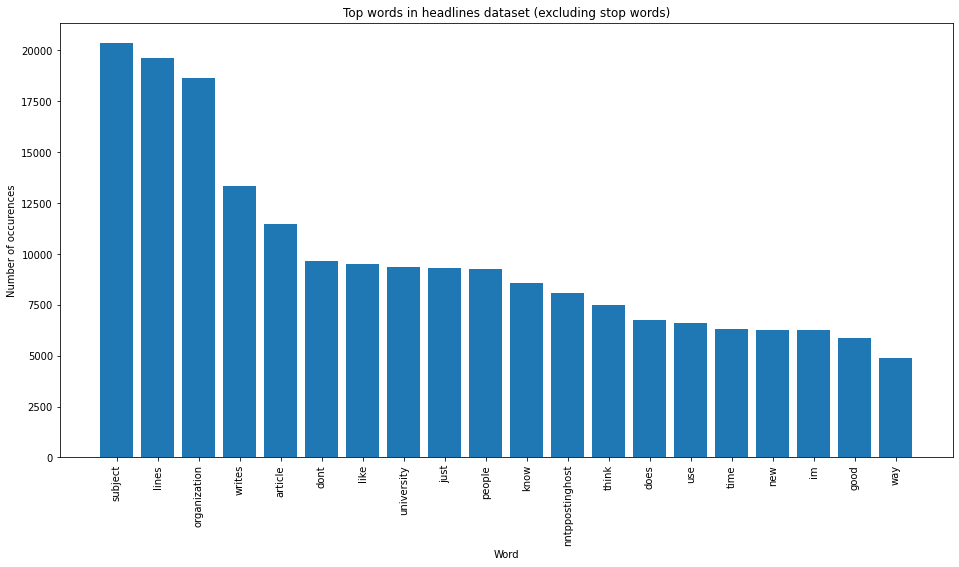

In [19]:
specific_column = nd["email"]
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=specific_column)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

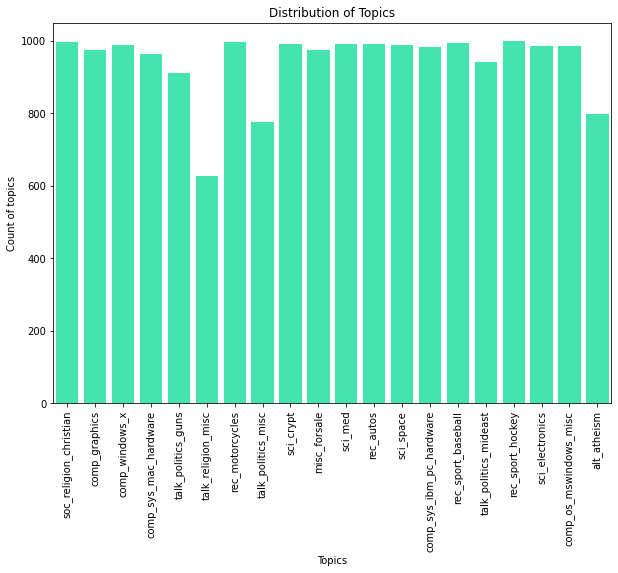

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)


# plot distribution of topics in news data
fig = plt.figure(figsize=[10,7])
ax = sns.countplot(nd['text'], color=sns.xkcd_rgb['greenish cyan'])
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count of topics')
plt.xticks(rotation=90)

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# remove stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = nd['email'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(nd['email'])):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

nd['email'] = detokenized_doc


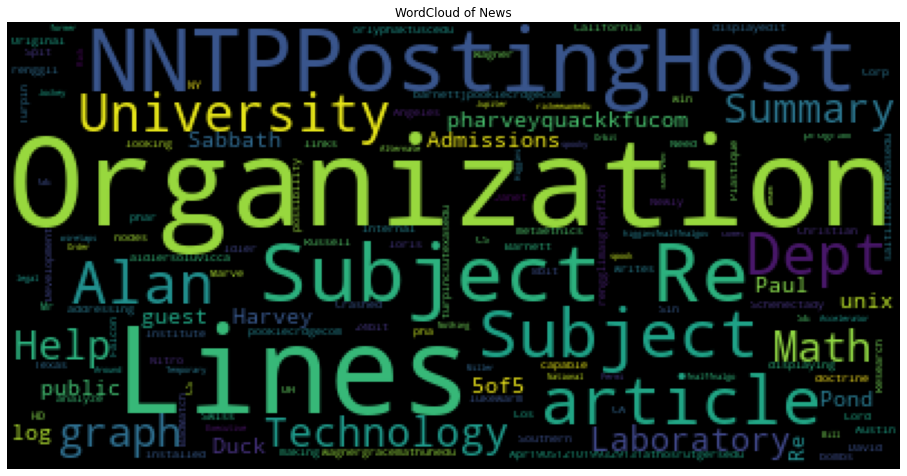

In [23]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='black',
                      max_words=200).generate(str(nd['email']))
fig = plt.figure(figsize=[16,16])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(nd['email'] )

X.shape # check shape of the document-term matrix

(18845, 1000)

In [25]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [26]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
       # print(" ")

Topic 0: 
article
university
dont
like
know
people
nntppostinghost
Topic 1: 
windows
thanks
email
card
drive
file
university
Topic 2: 
game
team
games
year
hockey
players
university
Topic 3: 
government
clipper
key
chip
encryption
keys
use
Topic 4: 
windows
game
team
dos
file
win
run
Topic 5: 
drive
car
scsi
ide
hard
drives
disk
Topic 6: 
chip
key
god
clipper
game
drive
encryption
Topic 7: 
drive
israel
windows
jews
israeli
scsi
people
Topic 8: 
11
xnewsreader
tin
version
drive
wrote
scsi
Topic 9: 
windows
sale
car
version
11
xnewsreader
tin
Topic 10: 
space
__
___
drive
new
apr
car
Topic 11: 
university
article
__
windows
___
drive
nntppostinghost
Topic 12: 
__
___
card
video
monitor
drivers
cards
Topic 13: 
__
___
car
thanks
email
game
file
Topic 14: 
car
israel
israeli
jews
apr
jewish
god
Topic 15: 
university
space
state
new
science
computer
windows
Topic 16: 
space
car
armenian
armenians
turkish
god
david
Topic 17: 
computer
science
window
department
new
dept
pittsburgh
Topic 18: 

Use of inbuilt data implement LSA model measuring Accuracy


In [27]:

from sklearn.datasets import fetch_20newsgroups
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True)

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
#stop_words += list(str.punctuation)
stop_words += ['__', '___']
# Uncomment and run the 3 lines below if you haven't got these packages already
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
def rmv_emails_websites(string):
    """Function removes emails, websites and numbers"""
    new_str = re.sub(r"\S+@\S+", '', string)
    new_str = re.sub(r"\S+.co\S+", '', new_str)
    new_str = re.sub(r"\S+.ed\S+", '', new_str)
    new_str = re.sub(r"[0-9]+", '', new_str)
    return new_str
X_train = list(map(rmv_emails_websites, X_train))
X_test  = list(map(rmv_emails_websites, X_test))

In [29]:
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=tokenizer.tokenize, 
                        max_df=0.2,
                        min_df=0.02
                       )
tfidf_train_sparse = tfidf.fit_transform(X_train)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=tfidf.get_feature_names())
tfidf_train_df.head()

,able,accept,access,across,act,action,actually,add,address,advance,advice,ago,agree,air,allow,almost,alone,along,already,although,always,america,american,among,amount,andrew,another,answer,anti,anybody,anyone,anything,anyway,apparently,appears,apple,application,apply,appreciate,apr,...,ways,week,weeks,well,went,western,whatever,whether,white,whole,whose,willing,win,window,windows,wish,within,without,women,wonder,wondering,word,words,work,working,works,world,worse,worth,write,written,wrong,wrote,yeah,year,years,yes,yet,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.186159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.148267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159876,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.109034,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.347023,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.083985,0.0,0.0,0.0,0.07727,0.000000,0.000000,0.091327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089866,0.0,0.266194,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.11757,0.095952,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.098685,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.161047,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.105101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.108921,0.0,0.000000,0.0,0.0,0.0,0.141444,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187348,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.148675,0.148312,0.0,0.0


In [32]:
from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=30, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

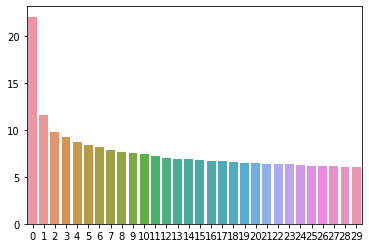

In [33]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [34]:

from sklearn import datasets, linear_model, metrics 
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
#
logreg_lsa =  linear_model.LogisticRegression()
logreg     =  linear_model.LogisticRegression()
logreg_param_grid = [{'penalty':['l1', 'l2']},
                 {'tol':[0.0001, 0.0005, 0.001]}]
grid_lsa_log = GridSearchCV(estimator=logreg_lsa,
                        param_grid=logreg_param_grid, 
                        scoring='accuracy', cv=5,
                        n_jobs=-1)
grid_log = GridSearchCV(estimator=logreg,
                        param_grid=logreg_param_grid, 
                        scoring='accuracy', cv=5,
                        n_jobs=-1)
best_lsa_logreg = grid_lsa_log.fit(tfidf_lsa_data, y_train).best_estimator_
best_reg_logreg = grid_log.fit(tfidf_train_df, y_train).best_estimator_
print("Accuracy of Logistic Regression on LSA train data is :", best_lsa_logreg.score(tfidf_lsa_data, y_train))
print("Accuracy of Logistic Regression with standard train data is :", best_reg_logreg.score(tfidf_train_df, y_train))

Accuracy of Logistic Regression on LSA train data is : 0.5988156266572389
Accuracy of Logistic Regression with standard train data is : 0.8250839667668376


Clustering using LSA model

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [36]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [37]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [39]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [42]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=30, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

30

In [43]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print(" ")
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end =" ") 

 
Topic 0: 
like know people think good time thanks  
Topic 1: 
thanks windows card drive mail file advance  
Topic 2: 
game team year games season players good  
Topic 3: 
drive scsi disk hard card drives problem  
Topic 4: 
windows file window files program using problem  
Topic 5: 
government chip mail space information encryption data  
Topic 6: 
like bike know chip sounds looks look  
Topic 7: 
card sale video offer monitor price jesus  
Topic 8: 
know card chip video government people clipper  
Topic 9: 
good know time bike jesus problem work  
Topic 10: 
think chip good thanks clipper need encryption  
Topic 11: 
thanks right problem good bike time window  
Topic 12: 
good people windows know file sale files  
Topic 13: 
space think know nasa problem year israel  
Topic 14: 
space good card people time nasa thanks  
Topic 15: 
people problem window time game want bike  
Topic 16: 
time bike right windows file need really  
Topic 17: 
time problem file think israel long mail  
To

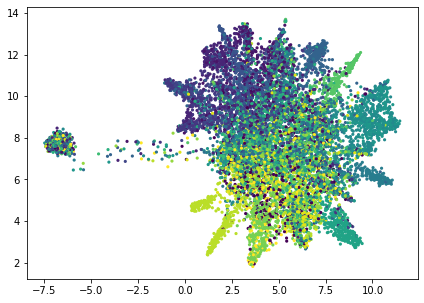

In [44]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()